In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('seaborn')

# Principal Component

In [3]:
df = pd.read_csv('data/magic04.data', header=None)
df.columns = [
    'fLength',
    'fWidth',
    'fSize',
    'fConc',
    'fConc1',
    'fAsym',
    'fM3Long',
    'fM3Trans',
    'fAlpha',
    'fDist', 
    'class'
]
df.drop(columns='class', inplace=True)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [5]:
cov_mat = df.cov().values

In [6]:
def power_iteration(A: np.ndarray, threshold=0.0001):
    x1 = np.ones(A.shape[1])
    norm_diff = np.inf
    while norm_diff >= threshold:
        x0 = x1
        x1 = A @ x0
        m = np.argmax(x1)
        eigen_val = x1[m] / x0[m]
        x1 = x1 / x1[m]
        norm_diff = np.linalg.norm(x1 - x0)
        
    x1 = x1 / np.linalg.norm(x1)
    return x1, eigen_val

In [7]:
u1, lambda1 = power_iteration(cov_mat, threshold=0.0001) 

In [8]:
lambda1

6579.64417914114

In [9]:
u1

array([ 3.27803435e-01,  1.13806444e-01,  3.06081041e-03, -9.27126183e-04,
       -5.21892475e-04, -3.80654220e-01, -7.16151680e-02,  3.37398960e-03,
       -5.35489289e-02,  8.52453671e-01])

In [10]:
np.linalg.eig(cov_mat)[0][0]

6579.791399778593

In [11]:
np.linalg.eig(cov_mat)[1][0]

array([-3.27812305e-01, -1.34406332e-01,  6.55078481e-02,  8.63988253e-01,
        9.45511967e-02, -1.98552026e-02,  3.38166662e-01,  3.99907112e-03,
       -4.54836725e-04,  4.57080123e-05])

# First Two Principal Components

In [12]:
def power_iteration2(A: np.ndarray, threshold=0.001):
    x1 = np.ones((A.shape[1], 2))
    diff = np.inf
    while diff >= threshold:
        x0 = x1
        x1 = A @ x0
        x1[:, 1] = x1[:, 1] - np.dot(x1[:, 0], x1[:, 1]) / ((np.linalg.norm(x1[:, 0]))**2) * x1[:, 0]
        x1[:, 0] = x1[: ,0] / np.linalg.norm(x1[:, 0])
        x1[:, 1] = x1[: ,1] / np.linalg.norm(x1[:, 1])
        diff = np.abs(x1 - x0).sum()
        
    return x1[:, 0], x1[:, 1]

In [13]:
u1, u2 = power_iteration2(cov_mat)

In [14]:
u1

array([ 3.27768146e-01,  1.13792298e-01,  3.06098329e-03, -9.27193895e-04,
       -5.21932523e-04, -3.80472104e-01, -7.14675181e-02,  3.37371851e-03,
       -5.35799845e-02,  8.52560865e-01])

In [15]:
u2

array([-1.34510431e-01, -5.39220472e-02,  6.58423243e-04, -2.57927921e-04,
       -1.52554250e-04,  6.93994142e-01,  5.62686284e-01, -1.03411551e-03,
       -1.18336588e-01,  4.08350944e-01])

In [16]:
u = np.c_[u1, u2]

In [17]:
coordinates = df.values @ u
coordinates

array([[  66.78915343,   55.57554147],
       [ 174.62433613,  109.83246624],
       [ 243.47703472,  111.19196707],
       ...,
       [ 247.81385622,  105.072899  ],
       [ 396.10069037,   87.83081579],
       [ 372.53760651, -134.00693095]])

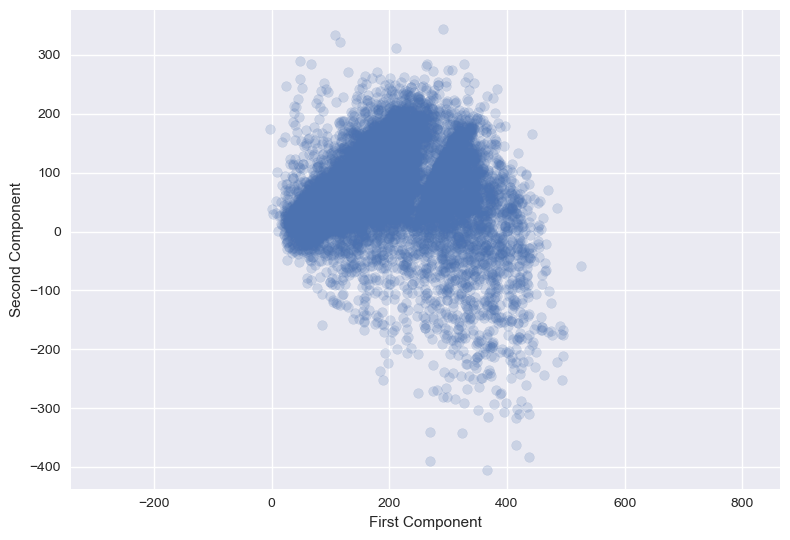

In [18]:
plt.scatter(coordinates[:, 0], coordinates[:, 1], alpha=0.2)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.axis('equal')
plt.tight_layout()